## Analyse the dice scores from HippUnfold

In [1]:
import os
import pandas as pd
import numpy as np
import random
import ptitprince as pt
import seaborn as sns

from aidhs.aidhs_cohort_hip import AidhsCohort, AidhsSubject
from aidhs.paths import BASE_PATH

Setting DATA_PATH to /home/mathilde/Documents/projects/surHippo/processes/231211_preprocess_manuscript_submissionlAnnals
Setting BASE_PATH to /home/mathilde/Documents/projects/surHippo/processes/231211_preprocess_manuscript_submissionlAnnals
Setting EXPERIMENT_PATH to /home/mathilde/Documents/projects/surHippo/processes/231211_preprocess_manuscript_submissionlAnnals
Setting PARAMS_PATH to /home/mathilde/Documents/projects/surHippo/processes/231211_preprocess_manuscript_submissionlAnnals
Setting FS_SUBJECTS_PATH to /home/mathilde/Documents/projects/surHippo/processes/231211_preprocess_manuscript_submissionlAnnals/output/fs_outputs
Setting HIPPUNFOLD_SUBJECTS_PATH to /home/mathilde/Documents/projects/surHippo/processes/231211_preprocess_manuscript_submissionlAnnals/output/hippunfold_outputs
Setting BIDS_SUBJECTS_PATH to /home/mathilde/Documents/projects/surHippo/processes/231211_preprocess_manuscript_submissionlAnnals/output/bids_outputs


In [2]:
def get_hippunfold_scores(subject, hippunfold_folder):
        dices = []
        for hemi in ['L', 'R']:
            file_dice = os.path.join(hippunfold_folder, 'hippunfold', subject, 'qc', f'{subject}_hemi-{hemi}_desc-unetf3d_dice.tsv')
            df_temp = pd.read_csv(file_dice, sep = '\t', header=None)
            dices.append(round(df_temp.values[0][0],2))
        return dices
        

In [3]:
hemis=['lh', 'rh']

folder = '/home/mathilde/Documents/projects/surHippo/processes/231211_preprocess_manuscript_submissionlAnnals'

csv=os.path.join(folder, 'Hippunfold_QC.csv')

#get subjects 
df_ini = pd.read_csv(csv)
len(df_ini)

371

In [4]:
df_ini.head()

,subject_id,lh_pass_QC,rh_pass_QC
0,H11P0001,1,1
1,H11P0002,1,1
2,H11P0003,1,1
3,H11P0004,1,1
4,H11P0005,1,1


In [5]:
demo = pd.read_csv(os.path.join(folder,'demographics_file_with_excluded.csv'))
demo.head()

,ID,Freesurfer_folder,Freesurfer_ids,bids_folder,bids_ids,Hippunfold_folder,Hippunfold_ids,Site,Scanner,"Patient or Control (Patient = 1, Control = 0)",...,If other - please provide details.1,Seizure free,"Engel Outcome (I=1, II=2, III=3, IV=4, NO=not operated, operated but data not available = 555, control= 666)",ILAE class,"f/u for Engel (yr) (NO = not operated, missing data = 555, control= 666)","Lesion Mask (Y=1, N=0, control= 666)","3D FLAIR (1=yes, 0=no)","QC (good=1, borderline=2, poor=3)",Notes,Freesurfer version (5.3 or 6.0)
0,H1C0001,/home/mathilde/Documents/projects/surHippo/pro...,sub-017,/home/mathilde/Documents/projects/surHippo/pro...,H1C0001,/home/mathilde/Documents/projects/surHippo/pro...,H1C0001,H1,3T,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,H1C0002,/home/mathilde/Documents/projects/surHippo/pro...,sub-018,/home/mathilde/Documents/projects/surHippo/pro...,H1C0002,/home/mathilde/Documents/projects/surHippo/pro...,H1C0002,H1,3T,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H1C0003,/home/mathilde/Documents/projects/surHippo/pro...,sub-019,/home/mathilde/Documents/projects/surHippo/pro...,H1C0003,/home/mathilde/Documents/projects/surHippo/pro...,H1C0003,H1,3T,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H1C0004,/home/mathilde/Documents/projects/surHippo/pro...,sub-020,/home/mathilde/Documents/projects/surHippo/pro...,H1C0004,/home/mathilde/Documents/projects/surHippo/pro...,H1C0004,H1,3T,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,H1C0005,/home/mathilde/Documents/projects/surHippo/pro...,sub-021,/home/mathilde/Documents/projects/surHippo/pro...,H1C0005,/home/mathilde/Documents/projects/surHippo/pro...,H1C0005,H1,3T,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
def is_nan(x):
    return (x != x)

df=pd.DataFrame()
for subject in df_ini['subject_id']:
    # print(subject)
    # create subject object
    group=demo[demo['ID ']==subject]["group"].values[0]
    
    #get hippunfold scores
    hippunfold_ID=demo[demo['ID ']==subject]["Hippunfold_ids"].values[0]
    hippunfold_folder=demo[demo['ID ']==subject]["Hippunfold_folder"].values[0]
    dice_scores = get_hippunfold_scores('sub-'+hippunfold_ID, hippunfold_folder)
     
    #get ipsi , contra
    if group=='P':
        lesional_hemi = demo[demo['ID ']==subject]["Lesional hemi"].values[0]
    elif group=='DC':
        lesional_hemi = random.choice(['lh','rh'])   #random choice
    else:
        lesional_hemi = random.choice(['lh','rh'])   #random choice

    for i, hemi in enumerate(hemis):
        values={}
        #get demographic info 
        values['ID']=subject
        values['group']=group
        values['hemi'] = hemi
        if group=='C':
            values['lesional'] = 'Healthy controls'
        elif group=='DC':
            values['lesional'] = 'Disease controls'
        elif hemi==lesional_hemi:
            values['lesional'] = 'HS ipsilateral'
        else:
            values['lesional'] = 'HS contralateral'
        #get dice score              
        values['HippUnfold dice score']=dice_scores[i]
        values['pass_QC']=df_ini[df_ini['subject_id']==subject][f'{hemi}_pass_QC'].values[0]
        # save values for each subject in panda matrix
        df2 = pd.DataFrame([values])
        df = pd.concat([df,df2],ignore_index=True)

mean ipsi 0.7580891719745223
mean contra 0.7991082802547771
Ttest_indResult(statistic=-7.593392844733845, pvalue=3.6458217211336735e-13)


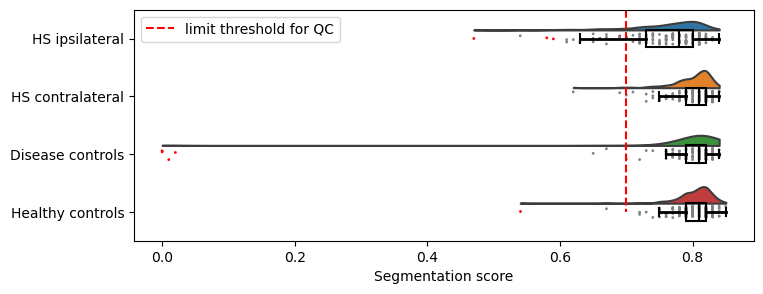

In [50]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 3))

condition_mask = ~df['pass_QC'].values.astype(bool)

order=['HS ipsilateral', 'HS contralateral', 'Disease controls', 'Healthy controls']

pt.half_violinplot( x = 'HippUnfold dice score', y = 'lesional', data = df, order=order, bw = .2, cut = 0.,
                      scale = "area", width = .6, inner = None, orient = 'h', ax=ax)

sns.boxplot(x = 'HippUnfold dice score', y = 'lesional', data = df, order=order, color = "black", width = .3, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=False, whiskerprops = {'linewidth':2, "zorder":10},\
              saturation = 1, orient = 'h')
sns.stripplot(x = 'HippUnfold dice score', y = 'lesional', data = df[condition_mask], order=order, color='red', edgecolor = "white",
                 size = 2, jitter = 1,  zorder = 0, orient = 'h', ax=ax,)
sns.stripplot(x = 'HippUnfold dice score', y = 'lesional', data = df[~condition_mask], order=order, color='grey', edgecolor = "white",
                 size = 2, jitter = 1, zorder = 0, orient = 'h', ax=ax, )
ax.plot([0.7,0.7], [-0.5,3], '--', color='red', label='limit threshold for QC')
ax.set_ylabel('')
ax.set_xlabel('Segmentation score')
plt.legend()

# stats
ipsi = df[df['lesional']=='HS ipsilateral']['HippUnfold dice score'].values
contra = df[df['lesional']=='HS contralateral']['HippUnfold dice score'].values

from scipy.stats import  ttest_ind
print(f'mean ipsi {ipsi.mean()}')
print(f'mean contra {contra.mean()}')
coef_tt = ttest_ind(ipsi, contra)
print(coef_tt)